In [1]:
import torch

In [17]:
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import SGD, Adam
import matplotlib.pyplot as plt
import seaborn as sns


Defining the neural network the biases and weights

In [26]:
class BasicNN (nn.Module):
  def __init__(self):
    super().__init__()
    self.w00 = nn.Parameter(torch.tensor(1.7),requires_grad= False)
    self.b00 = nn.Parameter(torch.tensor(-0.85),requires_grad= False)
    self.w01 = nn.Parameter(torch.tensor(-40.8),requires_grad= False)

    self.w10 = nn.Parameter(torch.tensor(12.6),requires_grad= False)
    self.b10 = nn.Parameter(torch.tensor(0.0),requires_grad= False)
    self.w11 = nn.Parameter(torch.tensor(2.7),requires_grad= False)

    self.final_bias = nn.Parameter(torch.tensor(-16.),requires_grad= False)

  def forward(self, input):
   input_to_top_relu = input * self.w00 + self.b00
   top_relu_output = F.relu(input_to_top_relu) #Relu function comes from the Functional Module
   scaled_top_relu_output = top_relu_output*self.w01

   input_to_bottom_relu = input * self.w10 + self.b10
   bottom_relu_output = F.relu(input_to_bottom_relu) #Relu function comes from the Functional Module
   scaled_bottom_relu_output = bottom_relu_output*self.w11

   input_to_final_relu = scaled_top_relu_output + scaled_bottom_relu_output + self.final_bias

   output = F.relu(input_to_final_relu)

   return output



Now we have to connect these to the input,output and activation functions. We need to make a forward function that uses both the biases and weights that are initialized.

__init__ initializes the weights and biases
forward() does a forward pass through the neural network by taking an input value and calculating output with weight and biases

Pytorch function linspace to create a tensor of a sequence of 11 values between 0 and 1

In [27]:
input_doses = torch.linspace(start=0,end=1,steps=11)

In [28]:
input_doses

tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000, 1.0000])

Text(0.5, 0, 'Dose')

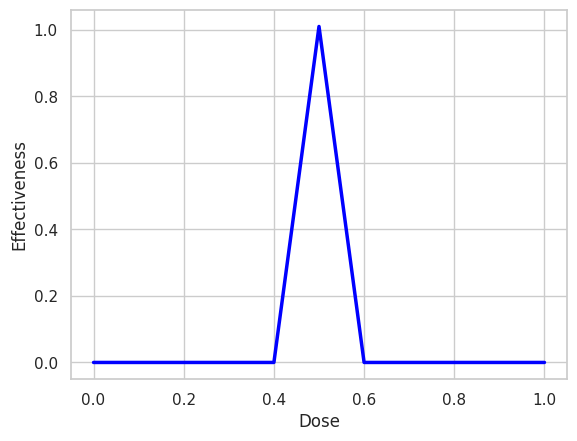

In [29]:
model = BasicNN()
output_values = model(input_doses)
sns.set(style ='whitegrid')
sns.lineplot(x=input_doses,
             y=output_values,
             color='blue',
             linewidth =2.5)
plt.ylabel('Effectiveness')
plt.xlabel('Dose')

So here we graphed the results using Pytorch without using Back Propagation.
Let's use Backpropagation to optimize the value of bfinal which is -16 in earlier case.

We change the value of final bias to 0 and requires_grad to True( saying that the parameter must be optimized)

In [57]:
class BasicNN_train (nn.Module):
  def __init__(self):
    super().__init__()
    self.w00 = nn.Parameter(torch.tensor(1.7),requires_grad= False)
    self.b00 = nn.Parameter(torch.tensor(-0.85),requires_grad= False)
    self.w01 = nn.Parameter(torch.tensor(-40.8),requires_grad= False)

    self.w10 = nn.Parameter(torch.tensor(12.6),requires_grad= False)
    self.b10 = nn.Parameter(torch.tensor(0.0),requires_grad= False)
    self.w11 = nn.Parameter(torch.tensor(2.7),requires_grad= False)

    self.final_bias = nn.Parameter(torch.tensor(0.0),requires_grad= True)

  def forward(self, input):
   input_to_top_relu = input * self.w00 + self.b00
   top_relu_output = F.relu(input_to_top_relu) #Relu function comes from the Functional Module
   scaled_top_relu_output = top_relu_output*self.w01

   input_to_bottom_relu = input * self.w10 + self.b10
   bottom_relu_output = F.relu(input_to_bottom_relu) #Relu function comes from the Functional Module
   scaled_bottom_relu_output = bottom_relu_output*self.w11

   input_to_final_relu = scaled_top_relu_output + scaled_bottom_relu_output + self.final_bias

   output = F.relu(input_to_final_relu)

   return output



Text(0.5, 0, 'Dose')

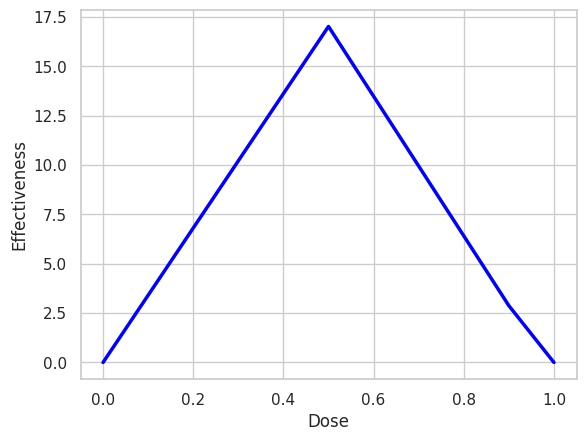

In [58]:
model = BasicNN_train()
output_values = model(input_doses)


sns.set(style ='whitegrid')
sns.lineplot(x=input_doses,
             y=output_values.detach(), #final_bias has a gradienr, we call detach() on output values to create new tensor that only has values
             color='blue',
             linewidth =2.5)
plt.ylabel('Effectiveness')
plt.xlabel('Dose')

effectiveness = 17 when dose = 0.5

In [59]:
inputs = torch.tensor([0.,0.5,1.])
labels = torch.tensor([0.,1.,0.])

optimizer = SGD(model.parameters(),lr =0.1) # to optimize model.parameters() to SGD() to optimize para set to true
print('Final bias, before optimization-' +str(model.final_bias.data)+ "\n")


Final bias, before optimization-tensor(0.)



Each time our model sees all of the training data is 1 epoch

In [60]:
for epoch in range(100):
  total_loss = 0 #residue

  for iteration in range(len(inputs)):
    input_i = inputs[iteration]
    label_i = labels[iteration]

    output_i = model(input_i)

    loss = (output_i - label_i)**2 #squared residual like (0-0)^2
    loss.backward() # derivative of squared residual w.r.t to bfinal
    # accumulates derivatives each time we go through the nested loop

    total_loss += float(loss)

  if (total_loss < 0.0001):
    print('Num steps:' +str(epoch))
    break
  optimizer.step()
  optimizer.zero_grad()
  print('Step:'+str(epoch)+' Final bias, after optimization-' +str(model.final_bias.data)+ "\n")

print('Final bias, after optimization-' +str(model.final_bias.data)+ "\n")

Step:0 Final bias, after optimization-tensor(-3.2020)

Step:1 Final bias, after optimization-tensor(-5.7636)

Step:2 Final bias, after optimization-tensor(-7.8129)

Step:3 Final bias, after optimization-tensor(-9.4523)

Step:4 Final bias, after optimization-tensor(-10.7638)

Step:5 Final bias, after optimization-tensor(-11.8131)

Step:6 Final bias, after optimization-tensor(-12.6525)

Step:7 Final bias, after optimization-tensor(-13.3240)

Step:8 Final bias, after optimization-tensor(-13.8612)

Step:9 Final bias, after optimization-tensor(-14.2909)

Step:10 Final bias, after optimization-tensor(-14.6348)

Step:11 Final bias, after optimization-tensor(-14.9098)

Step:12 Final bias, after optimization-tensor(-15.1298)

Step:13 Final bias, after optimization-tensor(-15.3059)

Step:14 Final bias, after optimization-tensor(-15.4467)

Step:15 Final bias, after optimization-tensor(-15.5594)

Step:16 Final bias, after optimization-tensor(-15.6495)

Step:17 Final bias, after optimization-tensor

After 34 steps we achieve optimal value

Text(0.5, 0, 'Dose')

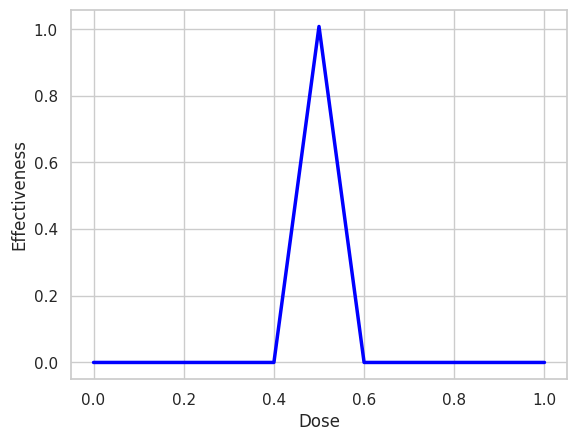

In [61]:
output_values = model(input_doses)


sns.set(style ='whitegrid')
sns.lineplot(x=input_doses,
             y=output_values.detach(),
             color='blue',
             linewidth =2.5)
plt.ylabel('Effectiveness')
plt.xlabel('Dose')